In [1]:
#Mount Drive 
import os

# Mount drive if not mounted already & change current working directory to MyDrive
if not os.path.exists('/content/drive/'):
  from google.colab import drive
  drive.mount('/content/drive/')

if os.path.exists('/content/drive'):
  os.chdir('drive/My Drive')
  print('Current working directory:', os.getcwd())

Current working directory: /content/drive/My Drive


In [2]:
cd Weather_FS/

/content/drive/My Drive/Weather_FS


In [3]:
#import libs

import requests
import json
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf



#ml libs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
!pip install pmdarima

In [4]:
# Import auto-arima - grid search for ARIMA.
from pmdarima.arima import auto_arima

In [ ]:
'''api_key='c7c7fb5b6f95f4dc7dcea144c805e686'

lat = "41.8781"
lon = "87.6298"
url = "https://api.openweathermap.org/data/2.5/onecall?lat=%s&lon=%s&appid=%s&units=metric" % (lat, lon, api_key)

response = requests.get(url)
data = json.loads(response.text)
print(data)'''

{'lat': 41.8781, 'lon': 87.6298, 'timezone': 'Asia/Shanghai', 'timezone_offset': 28800, 'current': {'dt': 1650033438, 'sunrise': 1649978981, 'sunset': 1650026945, 'temp': 9.05, 'feels_like': 5.32, 'pressure': 1020, 'humidity': 12, 'dew_point': -16.92, 'uvi': 0, 'clouds': 0, 'visibility': 10000, 'wind_speed': 8.46, 'wind_deg': 91, 'wind_gust': 10.71, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}]}, 'minutely': [{'dt': 1650033480, 'precipitation': 0}, {'dt': 1650033540, 'precipitation': 0}, {'dt': 1650033600, 'precipitation': 0}, {'dt': 1650033660, 'precipitation': 0}, {'dt': 1650033720, 'precipitation': 0}, {'dt': 1650033780, 'precipitation': 0}, {'dt': 1650033840, 'precipitation': 0}, {'dt': 1650033900, 'precipitation': 0}, {'dt': 1650033960, 'precipitation': 0}, {'dt': 1650034020, 'precipitation': 0}, {'dt': 1650034080, 'precipitation': 0}, {'dt': 1650034140, 'precipitation': 0}, {'dt': 1650034200, 'precipitation': 0}, {'dt': 1650034260, 'precipit

In [ ]:
'''zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)'''

In [ ]:
'''df = pd.read_csv(csv_path)
df.tail()'''

In [5]:
df = pd.read_csv('weatherAUS.csv')

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [11]:
melb = df[df['Location']=='Melbourne']
melb['Date'] = pd.to_datetime(melb['Date'])
melb.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


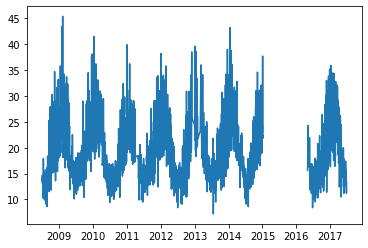

In [12]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


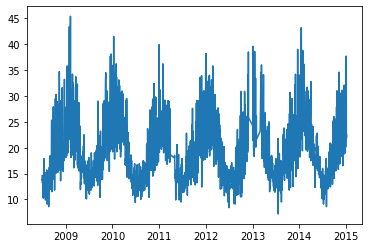

In [13]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [14]:
melb.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
69846,2015-12-27,Melbourne,NaN,NaN,NaN,4.4,8.9,SSE,48.0,SSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69847,2015-12-28,Melbourne,NaN,NaN,NaN,6.0,13.3,SSE,39.0,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69848,2015-12-29,Melbourne,NaN,NaN,NaN,8.0,13.4,S,35.0,SSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69849,2015-12-30,Melbourne,NaN,NaN,NaN,7.0,12.4,SSE,44.0,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
69850,2015-12-31,Melbourne,NaN,NaN,NaN,15.2,11.4,NNW,48.0,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [15]:
melb_data = df[['Date','Temp3pm']]
melb_data.dropna(inplace=True)
melb_data.columns = ['ds','temp']
melb_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ds,temp
0,2008-12-01,21.8
1,2008-12-02,24.3
2,2008-12-03,23.2
3,2008-12-04,26.5
4,2008-12-05,29.7


In [16]:
melb_data.tail()

,ds,temp
145455,2017-06-21,22.4
145456,2017-06-22,24.5
145457,2017-06-23,26.1
145458,2017-06-24,26.0
145459,2017-06-25,20.9


In [17]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [ ]:
perform_adf_test(melb_data['temp'])

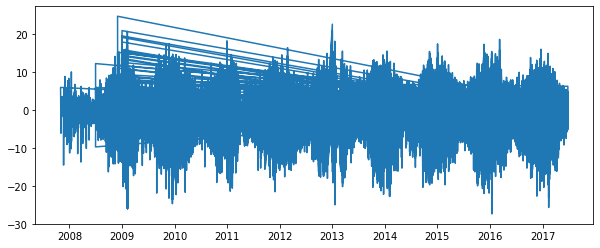

In [ ]:
'''diff_1 = melb_data['temp'].diff().dropna()
plt.figure(figsize=(10,4))
plt.plot(diff_1)'''

In [ ]:
'''perform_adf_test(diff_1)'''

ADF Statistic: -37.414591
p-value: 0.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


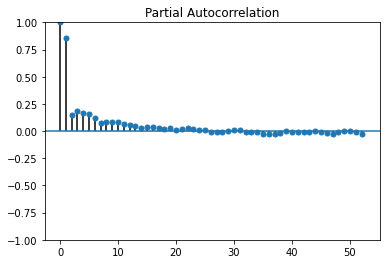

In [18]:
#PACF plot for determining the p value that is AR model
plot_pacf(melb_data['temp'])
plt.show()

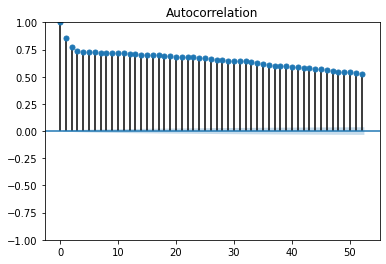

In [19]:
#ACF plot to dtermine the q value that is MA model
plot_acf(melb_data['temp'])
plt.show()

In [19]:
from datetime import datetime,timedelta
train_dataset_end= datetime(2015,6,25)
test_dataset_end= datetime(2017,6,25)

In [20]:
print(train_dataset_end)

2015-06-25 00:00:00


In [21]:
melb_data.index = pd.to_datetime(melb_data['ds'])

In [22]:
melb_data.index

DatetimeIndex(['2008-12-01', '2008-12-02', '2008-12-03', '2008-12-04',
               '2008-12-05', '2008-12-06', '2008-12-07', '2008-12-08',
               '2008-12-09', '2008-12-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='ds', length=141851, freq=None)

In [23]:
melb_data

,ds,temp
ds,,
2008-12-01,2008-12-01,21.8
2008-12-02,2008-12-02,24.3
2008-12-03,2008-12-03,23.2
2008-12-04,2008-12-04,26.5
2008-12-05,2008-12-05,29.7
...,...,...
2017-06-21,2017-06-21,22.4
2017-06-22,2017-06-22,24.5
2017-06-23,2017-06-23,26.1


In [24]:
train_data_melb= melb_data[:'2015-06-25']
test_data_melb= melb_data['2015-06-26': '2017-06-25']

In [25]:
test_data_melb.head()

,ds,temp
ds,,
2015-06-26,2015-06-26,13.9
2015-06-27,2015-06-27,11.3
2015-06-28,2015-06-28,11.0
2015-06-29,2015-06-29,12.8
2015-06-30,2015-06-30,8.2


In [ ]:
# Perform grid search for the ARIMA model.
stepwise_model = auto_arima(melb_data['temp'],
                            start_p=0,
                            start_q=0,
                            max_p=5,
                            max_q=5,
                            seasonal=False,
                            d=2,
                            D=0,
                            trace=True,
                            suppress_warnings=True,
                            error_action='ignore',
                            stepwise=True)
print(stepwise_model.aic())

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA = ARIMA(melb_data['temp'],order=(5,2,0))
model_ARIMA_fit = model_ARIMA.fit()
model_ARIMA_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:               141851
Model:                 ARIMA(5, 2, 0)   Log Likelihood             -397666.984
Date:                Wed, 01 Jun 2022   AIC                         795345.968
Time:                        00:51:54   BIC                         795405.143
Sample:                             0   HQIC                        795363.649
                             - 141851                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0061      0.002   -493.069      0.000      -1.010      -1.002
ar.L2         -0.9453      0.003   -342.219      0.000      -0.951      -0.940
ar.L3         -0.7726      0.003   -260.580      0.000      -0.778      -0.767
ar.L4         -0.5412      0.003   -202.325      0.000      -0.546      -0.536
ar.L5         -0.2707      0.002   -136.550      0.000      -0.275      -0.267
sigma2        15.9432      0.038    415.555      0.000      15.868      16.018
===================================================================================
Ljung-Box (L1) (Q):                 499.01   Jarque-Bera (JB):             71606.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_SARIMA=SARIMAX(melb_data['temp'],order=(1,0,1),seasonal_order=(0,1,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               temp   No. Observations:               141851
Model:             SARIMAX(1, 0, 1)x(0, 1, 0, 12)   Log Likelihood             -415990.091
Date:                            Mon, 18 Apr 2022   AIC                         831986.183
Time:                                    15:14:36   BIC                         832015.770
Sample:                                         0   HQIC                        831995.023
                                         - 141851                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4272      0.004    110.377      0.000       0.420       0.435
ma.L1          0.0964      0.004     22.083      0.000       0.088       0.105
sigma2        20.6514      0.057    360.033      0.000      20.539      20.764
===================================================================================
Ljung-Box (Q):                    33654.41   Jarque-Bera (JB):             18009.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
##prediction
pred_start_date=test_data_melb.index[0]
pred_end_date=test_data_melb.index[-1]

In [ ]:
pred_Sarima=model_SARIMA_fit.predict(start='2015-06-26',end='2017-06-25')
residuals=test_data_melb['temp']- pred_Sarima

In [28]:
#ARIMA
pred_arima=model_ARIMA_fit.predict(start='2015-06-26',end='2017-06-25')
residuals=test_data_melb['temp']- pred_arima

In [29]:
test_data_melb['Predicted_ARIMA']=pred_arima

In [30]:
test_data_melb

,ds,temp,Predicted_ARIMA
ds,,,
2015-06-26,2015-06-26,13.9,12.308058
2015-06-27,2015-06-27,11.3,14.438144
2015-06-28,2015-06-28,11.0,11.804987
2015-06-29,2015-06-29,12.8,11.625424
2015-06-30,2015-06-30,8.2,11.740793
...,...,...,...
2017-06-21,2017-06-21,22.4,13.839008
2017-06-22,2017-06-22,24.5,14.416937
2017-06-23,2017-06-23,26.1,13.858710


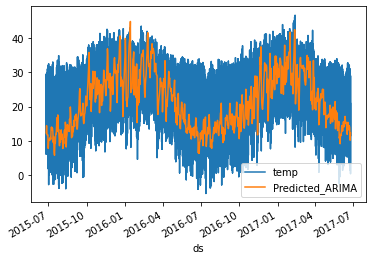

In [31]:
test_data_melb[['temp','Predicted_ARIMA']].plot()

In [37]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=0050a3b81fea534dd756b58edf92119bcabbec9d15d195e19d970d8e63bded4f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [47]:
from wget import download
from os.path import isfile
filename = 'sklearn_arima-0.1.zip'

if not isfile(filename):
    filename = download(
        'https://github.com/IBMDataScience/sample-notebooks/blob/master/' +
        'Files/sklearn_arima-0.1.zip'
    )

print(filename)

sklearn_arima-0.1.zip


In [55]:
ls

neural_prophet_weather_fs      sklearn_arima-0.1/     weatherAUS.csv
neural_prophet_weather_fs.pkl  sklearn_arima-0.1.zip


In [ ]:
!pip install sklearn_arima-0.1.zip

In [66]:
from sklearn.pipeline import Pipeline


Neural Prophet

In [ ]:
!pip install neuralprophet

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
melb_data_2 = melb[['Date','Temp3pm']]
melb_data_2.dropna(inplace=True)
melb_data_2.columns = ['ds','y']
melb_data_2.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


In [ ]:
#melb_data = melb_data.reset_index(drop=True)
melb_data.head()

,ds,temp
ds,,
2008-12-01,2008-12-01,21.8
2008-12-02,2008-12-02,24.3
2008-12-03,2008-12-03,23.2
2008-12-04,2008-12-04,26.5
2008-12-05,2008-12-05,29.7


In [ ]:
m = NeuralProphet()
model_neu_pro = m.fit(melb_data_2, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 152


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-02, min: 1.74E+00


  0%|          | 0/134 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-02, min: 2.03E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.41E-02
Epoch[152/152]: 100%|██████████| 152/152 [00:38<00:00,  3.94it/s, SmoothL1Loss=0.0145, MAE=3.02, RMSE=3.93, RegLoss=0]


In [ ]:
#forecasting
future_preds = m.make_future_dataframe(melb_data_2,periods=900)
forecast = m.predict(future_preds)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.431934,NaN,20.676510,5.464020,0.291402
1,2015-01-07,None,26.239628,NaN,20.679663,5.601040,-0.041075
2,2015-01-08,None,26.506157,NaN,20.682814,5.734268,0.089076
3,2015-01-09,None,26.605446,NaN,20.685965,5.863004,0.056480
4,2015-01-10,None,26.652897,NaN,20.689117,5.986572,-0.022791


In [ ]:
forecast.tail()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
895,2017-06-19,None,17.355225,NaN,23.496635,-5.801277,-0.340136
896,2017-06-20,None,17.939835,NaN,23.499790,-5.851356,0.291402
897,2017-06-21,None,17.564932,NaN,23.502937,-5.896931,-0.041075
898,2017-06-22,None,17.657196,NaN,23.506088,-5.937970,0.089076
899,2017-06-23,None,17.591251,NaN,23.509239,-5.974471,0.056480


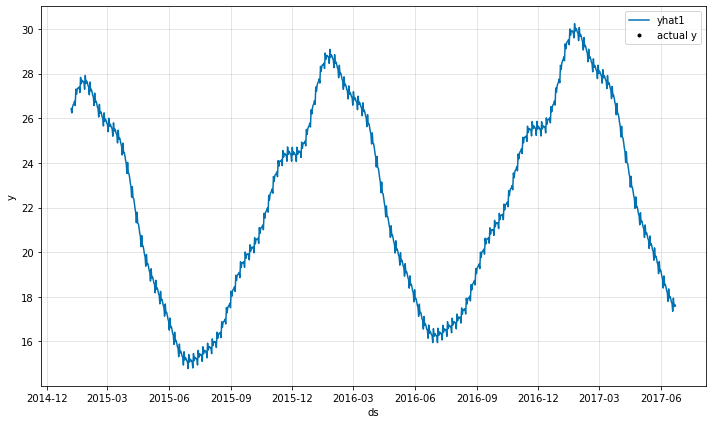

In [ ]:
 forecast_plot = m.plot(forecast)

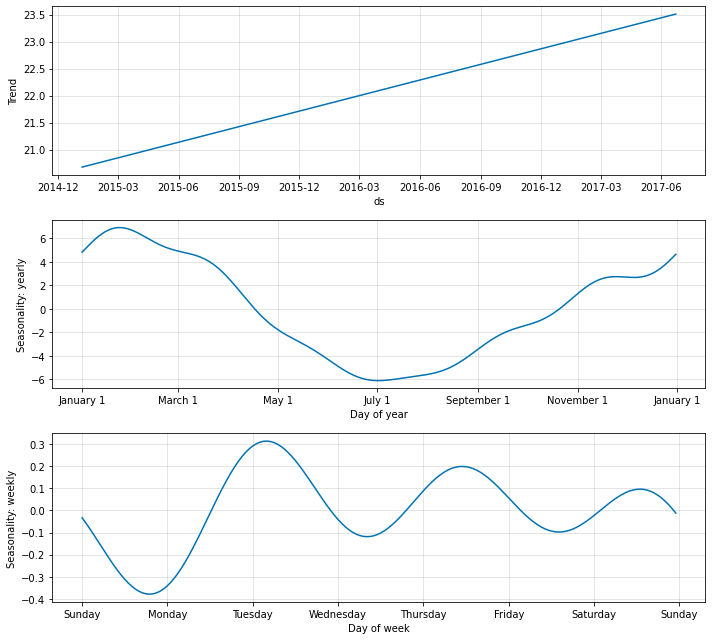

In [ ]:
comp_plot = m.plot_components(forecast)

In [ ]:
ls

neural_prophet_weather_fs  neural_prophet_weather_fs.pkl  weatherAUS.csv


In [ ]:
#save model
import pickle
with open('neural_prophet_weather_fs.pkl', 'wb') as f:
  pickle.dump(m,f)

In [ ]:
#load model and forecast
with open('neural_prophet_weather_fs.pkl', "rb") as l:
    loaded_model = pickle.load(l)

In [ ]:
future_preds = m.make_future_dataframe(melb_data_2, periods=900)
forecast = m.predict(future_preds)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2015-01-06,None,26.431934,NaN,20.676510,5.464020,0.291402
1,2015-01-07,None,26.239628,NaN,20.679663,5.601040,-0.041075
2,2015-01-08,None,26.506157,NaN,20.682814,5.734268,0.089076
3,2015-01-09,None,26.605446,NaN,20.685965,5.863004,0.056480
4,2015-01-10,None,26.652897,NaN,20.689117,5.986572,-0.022791


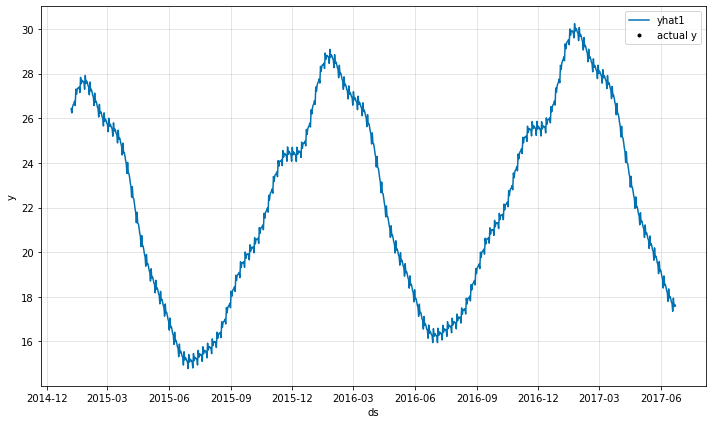

In [ ]:
plot1 = m.plot(forecast)

**IBM WATSON DEPLOYMENT**

In [ ]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 51 kB 523 kB/s 
     |████████████████████████████████| 824 kB 24.2 MB/s 
     |████████████████████████████████| 133 kB 41.4 MB/s 
     |████████████████████████████████| 547 kB 55.5 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72564 sha256=4199509c3a4716644b6c57f48f7a1c6ee76dff298b6540ddd9cbb97d46294f48
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=448ae06e036e9a2717a91acc89ed95ade463c013306c31d0fcfba33ceeb26967
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_sdk_s3transfer-2.7.0-py2.py3-none-any.whl size=88619 sha256=17c3e4b941851d37653f0f07c748beaefc54037

In [ ]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [ ]:
#AUTHENTICATE AND SETUP
wml_credentials = {
    'apikey': 'AGeRnmXHZBFFjdXUDKPQlv53AbRzzRUvWyTq6fa5fwy2',
    'url': 'https://us-south.ml.cloud.ibm.com'

}

In [ ]:
wml_client = APIClient(wml_credentials= wml_credentials)
wml_client.spaces.list()

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.
Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ----  ------------------------
ID                                    NAME  CREATED
5fc9ebe4-6ed9-4dbc-bbdf-22962e6adcad  PROD  2022-04-18T15:27:49.596Z
------------------------------------  ----  ------------------------


In [ ]:
SPACE_ID = '5fc9ebe4-6ed9-4dbc-bbdf-22962e6adcad'

In [ ]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [ ]:
#SAVE AND DEPLOY MODEL
MODEL_NAME = 'WeatherFS'
DEPLOYMENT_NAME = 'WeatherFS Deployment'
BEST_MODEL = m


In [ ]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.7')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'NeuralProphet', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

#Save model
model_details = wml_client.repository.store_model(
    model=BEST_MODEL, 
    meta_props=model_props, 
    training_data=melb_data_2['ds'].head(), 
    training_target=melb_data_2['y'].head()
)